# Movie Ratings - Classification Model

In [1]:
# Import initial dependencies
import pandas as pd
import os
import nltk

In [2]:
# Import movies dataframe
movies_df = pd.read_csv("https://data-bootcamp-ztc.s3.amazonaws.com/movies_complete_cleaned.csv")
movies_df.head()

,name,production,director,runtime,released,year,month,country_kaggle,country_omdb,star_kaggle,...,plot,awards,score_imdb,votes_imdb,score_metacritic,budget,genre_kaggle,gross,genres_omdb,rating
0,Doctor Strange,Marvel Studios,Scott Derrickson,115,2016-11-04,2016,11,USA,USA,Benedict Cumberbatch,...,"Marvel's ""Doctor Strange"" follows the story of...",Nominated for 1 Oscar. Another 19 wins & 67 no...,7.5,348307,72.0,165000000,Action,232641920,"Action, Adventure, Fantasy, Sci-Fi",PG-13
1,Sleight,Diablo Entertainment (II),J.D. Dillard,89,2017-04-28,2016,4,USA,USA,Jacob Latimore,...,A young street magician (Jacob Latimore) is le...,3 nominations.,5.9,4012,62.0,250000,Action,3986245,"Crime, Drama, Sci-Fi",R
2,Silence,Cappa Defina Productions,Martin Scorsese,161,2017-01-13,2016,1,USA,"USA, UK, Taiwan, Japan, Mexico, Italy",Andrew Garfield,...,The story of two Catholic missionaries (Andrew...,Nominated for 1 Oscar. Another 6 wins & 56 nom...,7.2,61798,79.0,46000000,Adventure,7100177,"Drama, History",R
3,Manchester by the Sea,Amazon Studios,Kenneth Lonergan,137,2016-12-16,2016,12,USA,USA,Casey Affleck,...,"Lee Chandler is a brooding, irritable loner wh...",Won 2 Oscars. Another 127 wins & 263 nominations.,7.9,159673,96.0,8500000,Drama,47695371,Drama,R
4,Dirty Grandpa,Lionsgate,Dan Mazer,102,2016-01-22,2016,1,USA,"United States, United Kingdom",Robert De Niro,...,"Jason Kelly, the grandson of Dick Kelly, loses...",2 wins & 11 nominations,6.0,82289,21.0,27500000,Comedy,35593113,Comedy,R


In [3]:
movies_df["rating"].value_counts()

R        3261
PG-13    1903
PG        927
G         143
NC-17      22
Name: rating, dtype: int64

In [4]:
#drop NC-17 as there are very few instances
movies_df = movies_df[movies_df["rating"]  != "NC-17"]

In [24]:
movies_df["genre_kaggle"].value_counts()

Comedy       1943
Action       1243
Drama        1225
Crime         460
Adventure     376
Biography     333
Animation     266
Horror        259
Mystery        37
Fantasy        29
Thriller       16
Romance        14
Family         14
Sci-Fi         13
War             2
Western         2
Musical         2
Name: genre_kaggle, dtype: int64

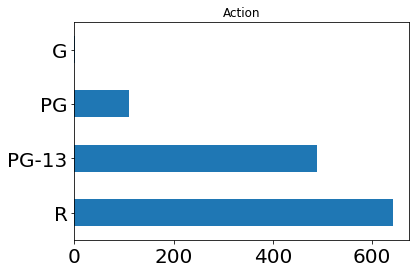

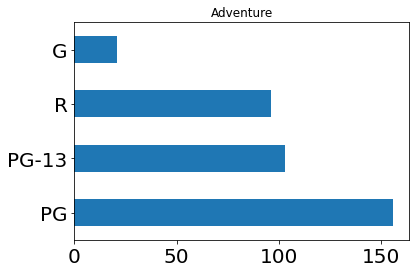

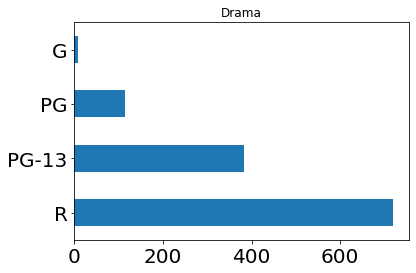

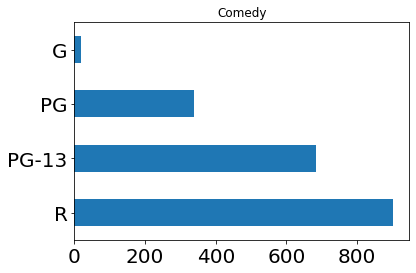

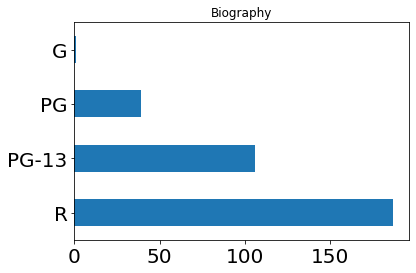

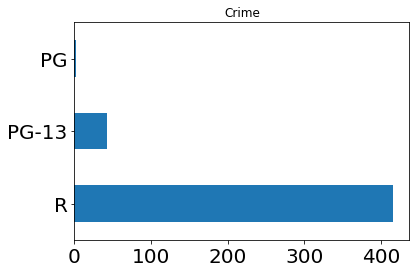

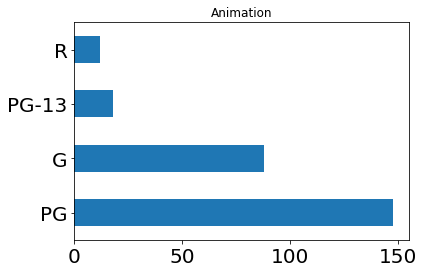

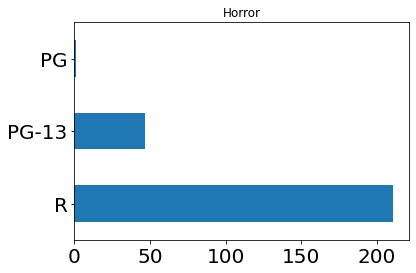

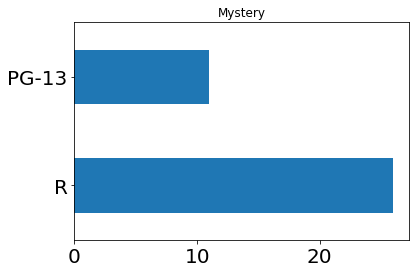

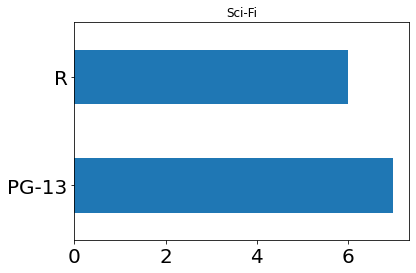

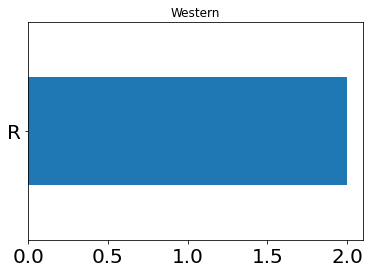

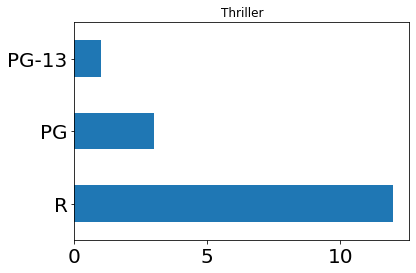

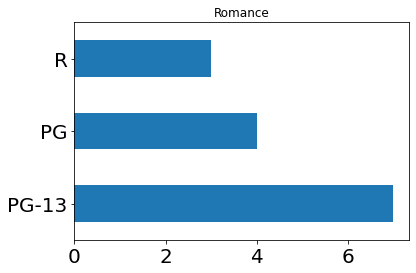

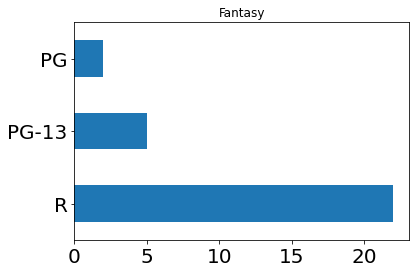

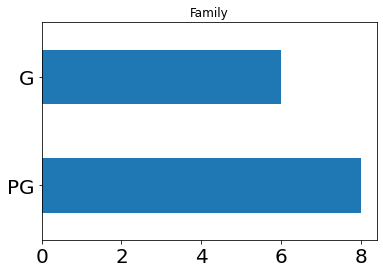

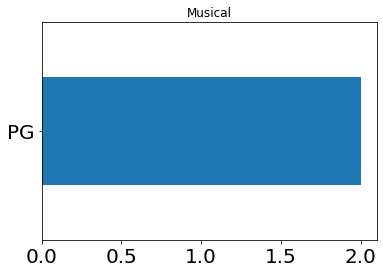

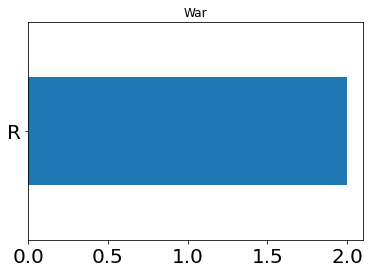

In [100]:
for genre in movies_df['genre_kaggle'].unique():
#     print(genre)
    df = movies_df[movies_df['genre_kaggle']==genre]  
#     print(len(df))
    plt.figure()
    plt.title(genre)
    df['rating'].value_counts().plot(kind='barh')

plt.show()

In [ ]:
"Mystery","Sci-Fi","Western","Thriller"

## Cleaning Data for Tokenization

In [5]:
# Extract plot data
plot_df = movies_df[["name", "plot", "genre_kaggle", "rating"]]
plot_df

,name,plot,genre_kaggle,rating
0,Doctor Strange,"Marvel's ""Doctor Strange"" follows the story of...",Action,PG-13
1,Sleight,A young street magician (Jacob Latimore) is le...,Action,R
2,Silence,The story of two Catholic missionaries (Andrew...,Adventure,R
3,Manchester by the Sea,"Lee Chandler is a brooding, irritable loner wh...",Drama,R
4,Dirty Grandpa,"Jason Kelly, the grandson of Dick Kelly, loses...",Comedy,R
...,...,...,...,...
6251,Hoosiers,Based on the true story of a small-town Indian...,Drama,PG
6252,Off Beat,Traumatised paramedic looks for the woman of h...,Comedy,PG
6253,Big Trouble in Little China,"Truck driver Jack Burton arrives in Chinatown,...",Action,PG-13
6254,Biggles: Adventures in Time,One minute the New Yorker advertising expert J...,Adventure,PG


In [6]:
plot_df["plot"].fillna("", inplace=True)
plot_df

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,name,plot,genre_kaggle,rating
0,Doctor Strange,"Marvel's ""Doctor Strange"" follows the story of...",Action,PG-13
1,Sleight,A young street magician (Jacob Latimore) is le...,Action,R
2,Silence,The story of two Catholic missionaries (Andrew...,Adventure,R
3,Manchester by the Sea,"Lee Chandler is a brooding, irritable loner wh...",Drama,R
4,Dirty Grandpa,"Jason Kelly, the grandson of Dick Kelly, loses...",Comedy,R
...,...,...,...,...
6251,Hoosiers,Based on the true story of a small-town Indian...,Drama,PG
6252,Off Beat,Traumatised paramedic looks for the woman of h...,Comedy,PG
6253,Big Trouble in Little China,"Truck driver Jack Burton arrives in Chinatown,...",Action,PG-13
6254,Biggles: Adventures in Time,One minute the New Yorker advertising expert J...,Adventure,PG


In [7]:
# Remove punctuation
import string


def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)


plot_df["plot"] = [remove_punct(x) for x in plot_df["plot"]]

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [8]:
# Remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))


def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]

    return " ".join(text)


plot_df["plot"] = [remove_stopwords(x) for x in plot_df["plot"]]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daniellepintacasi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [9]:
# # Implement stemming
# from nltk.stem.porter import PorterStemmer

# stemmer = PorterStemmer()


# def stemming(text):
#     text = [stemmer.stem(word) for word in text.split()]

#     return " ".join(text)

In [10]:
# plot_df["plot"] = [stemming(x) for x in plot_df["plot"]]

## Tokenization

In [11]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

plot_df["tokens"] = plot_df["plot"].map(tokenizer.tokenize)

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [12]:
plot_df[["plot", "tokens"]].head()

,plot,tokens
0,marvels doctor strange follows story talented ...,"[marvels, doctor, strange, follows, story, tal..."
1,young street magician jacob latimore left care...,"[young, street, magician, jacob, latimore, lef..."
2,story two catholic missionaries andrew garfiel...,"[story, two, catholic, missionaries, andrew, g..."
3,lee chandler brooding irritable loner works ha...,"[lee, chandler, brooding, irritable, loner, wo..."
4,jason kelly grandson dick kelly loses grandmot...,"[jason, kelly, grandson, dick, kelly, loses, g..."


In [13]:
# TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer


def tfidf(data, ngrams=(1, 1)):
    tfidf_vectorizer = TfidfVectorizer(ngram_range=ngrams)
    train = tfidf_vectorizer.fit_transform(data)

    return train


train_tfidf = tfidf(plot_df["plot"])
# [x for x in train_tfidf.todense()[0][0:].tolist()[0] if x != 0]
train_tfidf

<6234x34827 sparse matrix of type '<class 'numpy.float64'>'
	with 280250 stored elements in Compressed Sparse Row format>

### Encode Ratings Label

In [15]:
# Grab ratings data to apply label encoding 
ratings = plot_df[["name", "rating"]]

# Import label encoder 
from sklearn import preprocessing

# Set label encoder method to variable for use
label_encoder = preprocessing.LabelEncoder()

# Encode ratigs  
ratings["encoded_rating"] = label_encoder.fit_transform(ratings["rating"]) 
ratings

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,name,rating,encoded_rating
0,Doctor Strange,PG-13,2
1,Sleight,R,3
2,Silence,R,3
3,Manchester by the Sea,R,3
4,Dirty Grandpa,R,3
...,...,...,...
6251,Hoosiers,PG,1
6252,Off Beat,PG,1
6253,Big Trouble in Little China,PG-13,2
6254,Biggles: Adventures in Time,PG,1


In [16]:
print("check encoding:")
print("---------------------------------------------------------------------------")
print(ratings.encoded_rating.value_counts())
print("---------------------------------------------------------------------------")
print(ratings.rating.value_counts())

check encoding:
---------------------------------------------------------------------------
3    3261
2    1903
1     927
0     143
Name: encoded_rating, dtype: int64
---------------------------------------------------------------------------
R        3261
PG-13    1903
PG        927
G         143
Name: rating, dtype: int64


### Encoding Genre and converting it into a matrix

In [17]:
genres = pd.get_dummies(plot_df["genre_kaggle"])  # one hot encoding genres
genres

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6251,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6252,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6253,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6254,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
import scipy
from scipy.sparse import csr_matrix
genres_mat = scipy.sparse.csr_matrix(genres.values)
genres_mat

<6234x17 sparse matrix of type '<class 'numpy.uint8'>'
	with 6234 stored elements in Compressed Sparse Row format>

### Train and Fit Model

In [32]:

"""
with genres no balancing
"""

#join ifidf vector and genre data
from scipy.sparse import coo_matrix, hstack
X_train_itidf_with_genre = hstack([train_tfidf,genres_mat])

data = X_train_itidf_with_genre
target = ratings["encoded_rating"]
target_names = ["G", "PG", "PG-13", "R"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

           G       1.00      0.03      0.05        38
          PG       0.43      0.31      0.36       215
       PG-13       0.48      0.30      0.37       489
           R       0.62      0.84      0.71       817

    accuracy                           0.57      1559
   macro avg       0.63      0.37      0.37      1559
weighted avg       0.56      0.57      0.54      1559



In [30]:
"""
With genres with balancing
"""
#join ifidf vector and genre data
from scipy.sparse import coo_matrix, hstack
X_train_itidf_with_genre = hstack([train_tfidf,genres_mat])

data = X_train_itidf_with_genre
target = ratings["encoded_rating"]
target_names = ["G", "PG", "PG-13", "R"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear',  class_weight='balanced')
model.fit(X_train, y_train)

# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

           G       0.47      0.47      0.47        38
          PG       0.34      0.35      0.34       215
       PG-13       0.43      0.54      0.48       489
           R       0.71      0.59      0.64       817

    accuracy                           0.54      1559
   macro avg       0.49      0.49      0.48      1559
weighted avg       0.56      0.54      0.55      1559



In [33]:
"""
without genre with balancing
"""

#join ifidf vector and genre data
from scipy.sparse import coo_matrix, hstack
X_train_itidf_with_genre = hstack([train_tfidf,genres_mat])

data = train_tfidf
target = ratings["encoded_rating"]
target_names = ["G", "PG", "PG-13", "R"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear',  class_weight='balanced')
model.fit(X_train, y_train)

# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

           G       0.50      0.03      0.05        38
          PG       0.31      0.31      0.31       215
       PG-13       0.43      0.43      0.43       489
           R       0.66      0.69      0.67       817

    accuracy                           0.54      1559
   macro avg       0.48      0.36      0.37      1559
weighted avg       0.54      0.54      0.53      1559



In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from scipy.sparse import coo_matrix, hstack


X_train_itidf_with_genre = hstack([train_tfidf,genres_mat])

data = X_train_itidf_with_genre
target = ratings["encoded_rating"]
target_names = ["G", "PG", "PG-13", "R"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000] },
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(class_weight = "balanced"), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.242 (+/-0.093) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.080 (+/-0.201) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.415 (+/-0.055) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.128 (+/-0.101) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.404 (+/-0.025) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.415 (+/-0.055) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.470 (+/-0.051) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.404 (+/-0.025) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.468 (+/-0.025) for {'C': 1, 'kernel': 'linear'}
0.452 (+/-0.044) for {'C': 10, 'kernel': 'linear'}
0.432 (+/-0.039) for {'C': 100, 'kernel': 'linear'}
0.412 (+/-0.030) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

           

KeyboardInterrupt: 

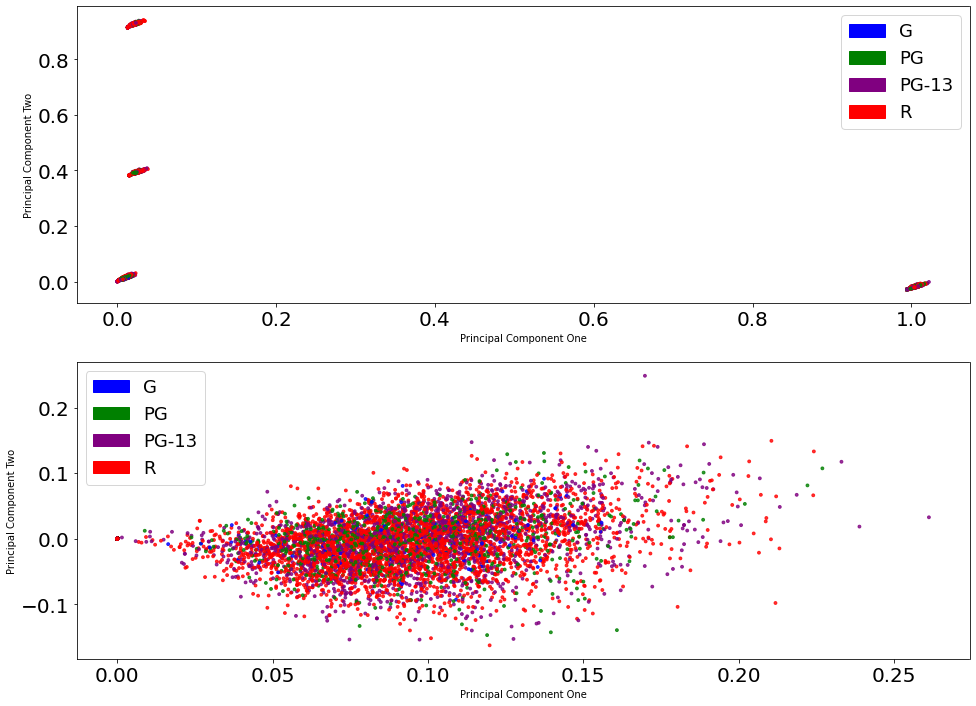

In [44]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.pyplot as plt

import matplotlib 
import matplotlib.patches as mpatches


X = hstack([train_tfidf,genres_mat])
X_genre = hstack([train_tfidf])
y = ratings["encoded_rating"]
test_labels = ["G", "PG", "PG-13", "R"]

def plot_LSA(test_data, test_labels, plot=True):
    """
    This function first uses SK-Learn's truncated SVD (LSA) class to 
    transform the high dimensionality (number of columns) of the BoW 
    embedding down to 2 dimensions. Then the two dimensions are used
    to plot each song, colored by the song writer (class).
    
    Inputs:
        test_data (pd.DataFrame): BoW embeddings.
        test_labels (pd.Series): In this case the songwriter of each
        Beatles' song.
        plot (boolean): Whether or not to plot. Defaults to True.
    
    Outputs:
        None.
    """
    
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(test_data)
    lsa_scores = lsa.transform(test_data)
    color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
    color_column = [color_mapper[label] for label in test_labels]
    colors = ['blue','green','purple', 'red']
    if plot:
        plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
        blue_patch = mpatches.Patch(color='blue', label='G')
        green_patch = mpatches.Patch(color='green', label='PG')
        purple_patch = mpatches.Patch(color='purple', label='PG-13')
        orange_patch = mpatches.Patch(color='red', label='R')
        plt.legend(handles=[blue_patch, green_patch, purple_patch, orange_patch], prop={'size': 18})
        plt.xlabel('Principal Component One')
        plt.ylabel('Principal Component Two')
        plt.rcParams["xtick.labelsize"] = 20
        plt.rcParams["ytick.labelsize"] = 20

plt.figure(1, figsize=(16, 12))
plt.subplot(2, 1, 1)
plot_LSA(X, y)
plt.subplot(2, 1, 2)
plot_LSA(X_genre, y)



'G'